In [219]:
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
import numpy as np

%matplotlib widget

# code modified to change negative values to positive ones
def lmap(f,x):
    return list(map(f,x))

# code modified to change negative values to positive ones
def lfilter(f,x):
    return list(filter(f,x))

def loadCSV(path, x_id=0, y_id=1):
    with open(path) as inp:
        lines = inp.read().split("\n")[1:-2]
        rows = lmap(lambda l: lmap(float, l.strip().split(",")), lines)

        return {"x": lmap(lambda r: r[x_id], rows), "y": lmap(lambda r: r[y_id], rows)}

In [220]:
def eval_state(distance_cm, omega_driving, k_omegs):
    plt.figure()

    print(f"./runs/d={distance_cm:.2f}_o={omega_driving:.2f}_k={k_omegs:.2f}.csv")
    dat = loadCSV(f"./runs/d={distance_cm:.2f}_o={omega_driving:.2f}_k={k_omegs:.2f}.csv")

    conv_len = 25
    dat_smooth = {
        "x": dat["x"][0: -conv_len + 1],
        "y": np.convolve(dat["y"], np.ones(conv_len) * 1/conv_len, "valid")
    }

    d_dat_smooth = {
        "x": dat_smooth["x"][:-1],
        "y": np.diff(dat_smooth["y"]) / (dat_smooth["x"][1] - dat_smooth["x"][0])
    }

    plt.plot(dat["x"], dat["y"])
    plt.plot(dat_smooth["x"], dat_smooth["y"])
    # plt.plot(d_dat_smooth["x"], d_dat_smooth["y"])

    print(np.average(dat["y"]))
    print(np.average(dat_smooth["y"]))
    print(np.average(d_dat_smooth["y"]))

./runs/d=7.00_o=10.00_k=0.65.csv
-1.0056235171791383
-1.010169090067603
0.028889943367109407
./runs/d=7.00_o=10.00_k=3.00.csv
-0.7613001579832066
-0.7536411621576046
0.10767176497510164


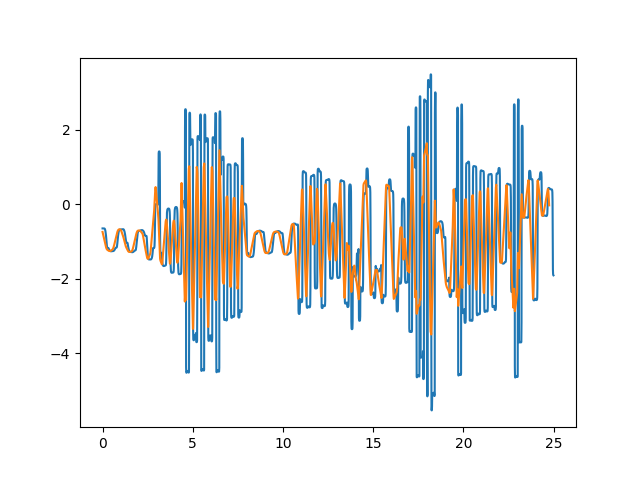

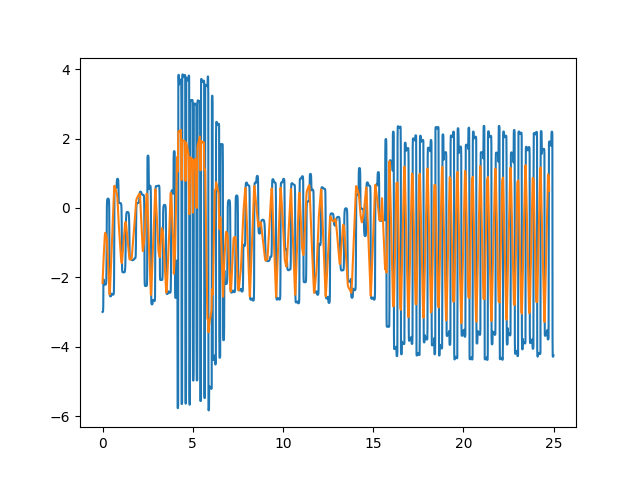

In [221]:
eval_state(7, 10, 0.65)
eval_state(7, 10, 3)